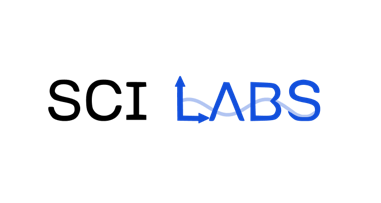

**Popis harmonického pohybu**

Mnoho pohybov z bežného života prebieha v harmonicky sa opakujúcich intervaloch. Striedanie dňa a noci, kmitanie závažia na pružine, otáčanie sa taniera v mikrovlnke...

Matematicky sú na popis takýchto javov vhodné goniometrické funkcie kvôli jasne definovanej perióde.

Napríklad zvislá poloha pri periodickom otáčaní veľkej hodinovej ručičky sa dá opísať pomocou goniometrickej funkcie kosínus.

<img src='https://drive.google.com/uc?export=view&id=1-hJEI0ieFs4ZmAK9Jf0cIohj4fRn9CKG' width=700px>


Na popísanie pohybu závažia na povraze stačia dve čísla - amplitúda a perióda. Perióda je čas, za ktorý sa vráti závažie do pôvodného stavu. POZOR - v polovici periódy je síce závažie v rovnakej polohe ako na začiatku, ale rýchlosť smeruje opačným smerom. Amplitúda hovorí o tom, ako ďaleko sa teleso dostane z rovnovážnej polohy.

Priebeh výchylky v čase $t$ sa teda dá vyjadriť matematicky ako
$x(t) = A \cos\left(\frac{2\pi t}{T}\right)$, kde A odpovedá amplitúde a T perióde. V prípade hodinovej ručičky by bola perióda T rovná 60 minútam.




Úloha 1: Zaveste senzor na kyvadlo, rozkývte ho a po dobu aspoň 10 sekúnd merajte jeho pohyb. Vykreslite zložky vektora zrýchlenia.

In [ ]:
# nacitanie kniznic
from google.colab import files
from google.colab import drive

from datetime import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
#from scipy.optimize import integrate
import matplotlib.pyplot as plt

drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df = pd.read_excel(r"/content/kyvadlo.xlsx") # nacitanie excelovskych dat
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df.iloc[0,0], format).timestamp()
time = np.array([datetime.strptime(x, format).timestamp() for x in df.iloc[:, 0] ])[0:-1] - t0
acc_x = np.array(df.iloc[:, 1][0:-1] )
acc_y = np.array(df.iloc[:, 2][0:-1] )
acc_z = np.array(df.iloc[:, 3][0:-1] )

(0.0, 10.0)

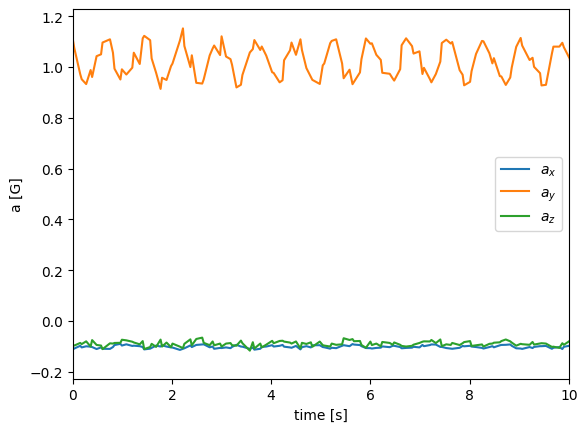

In [ ]:
# vykreslenie dat, upravte prvy riadok v zavislosti od toho ktoru zlozku zrychlenia chcete vykreslit

plt.plot(time,acc_x, label= '$a_x$')
plt.plot(time,acc_y, label= '$a_y$')
plt.plot(time,acc_z, label= '$a_z$')
plt.xlabel('time [s]')
plt.ylabel('a [G]')
plt.legend()
plt.xlim(0.0,10) # riadok na ktorom sa meni rozsah plotu x


Vidíme, že zložka y kmitá, ako je pri senzore SciLabs zvykom, okolo hodnoty 1 G, keďže je pripočítané gravitačné zrýchlenie Zeme. Aby sme lepšie porovnali všetky zložky zrýchlenia, môžeme jednotku od zrýchlenia v smere y odčítať.

(0.0, 10.0)

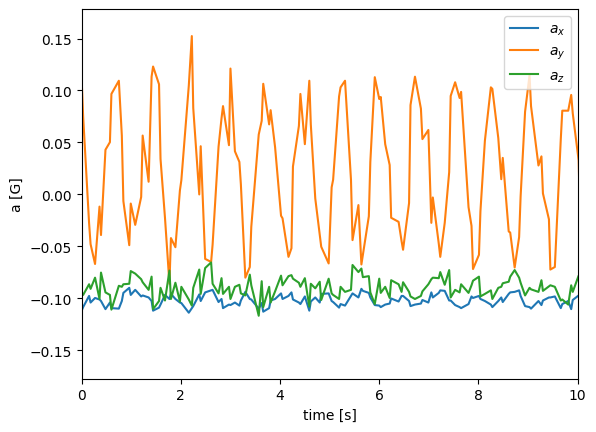

In [ ]:
# vykreslenie dat, upravte prvy riadok v zavislosti od toho ktoru zlozku zrychlenia chcete vykreslit

plt.plot(time,acc_x, label= '$a_x$')
plt.plot(time,acc_y-1, label= '$a_y$')
plt.plot(time,acc_z, label= '$a_z$')
plt.xlabel('time [s]')
plt.ylabel('a [G]')
plt.legend()
plt.xlim(0.0,10) # riadok na ktorom sa meni rozsah plotu x


Vidíme, že na ostatných zložkách kmitavý pohyb nepozorujeme, preto budeme popisovať iba zložku y.

Úloha 2 - Odhadnite z grafu hodnoty amplitúdy a periódy nameraného pohybu.Odhadnutú funkciu vykreslite spolu s nameranými dátami a porovnajte.  

Nápoveda: Periódu vieme odhadnúť pomocou spočítania poctu maxím grafu za časový úsek.

Perióda pohybu je 0.77 sekúnd


(0.0, 10.0)

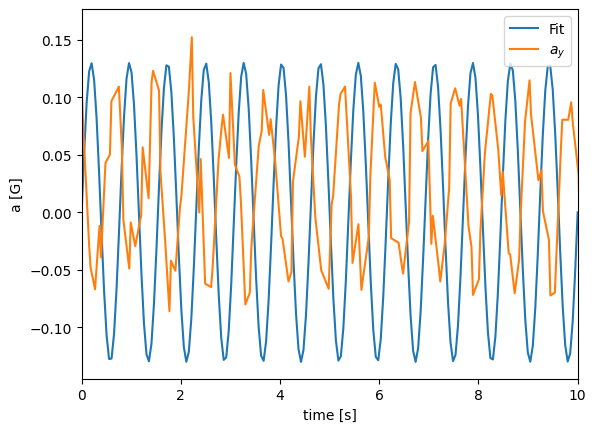

In [ ]:
N = 13 # pocet maxim (peakov) casoveho priebehu
t = 10 # casovy usek na ktorom bol pocet maxim pocitany
T = t / N # priblizna hodnota periody

print('Perióda pohybu je {:.2f} sekúnd'.format(T))

A = 0.13 # odhad amplitudy zrychlenia

t = np.linspace(0,10,200)
a = A * np.sin(2 * np.pi * (t) / T)

plt.plot(t,a, label = 'Fit')
plt.plot(time,acc_y-1, label= '$a_y$')
plt.xlabel('time [s]')
plt.ylabel('a [G]')
plt.legend()
plt.xlim(0.0,10) # riadok na ktorom sa meni rozsah plotu x

Vidíme, že hodnota hoci odhad periódy je správny, grafy nesedia z dvoch dôvodov. Po prvé sú v protifáze, takže je potrebné upraviť grafy vzhľadom na fázový posun a teda uvažovať funkciu v tvare $x(t) = A \cos\left(\frac{2\pi (t+t_0)}{T} \right)$ a takisto je potrebný aj posun po zvislej osi, keďže oscilácie nemajú stred presne v 0. Po úprave už dostávame finálnu verziu grafu v dostatočnej zhode.




Perióda pohybu je 0.77 sekúnd


(0.0, 10.0)

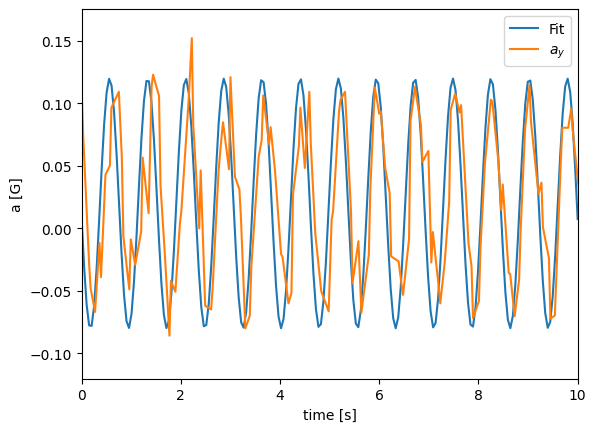

In [ ]:
N = 13 # pocet maxim (peakov) casoveho priebehu
t = 10 # casovy usek na ktorom bol pocet maxim pocitany
T = t / N # priblizna hodnota periody

print('Perióda pohybu je {:.2f} sekúnd'.format(T))

A = 0.1 # odhad amplitudy zrychlenia

t = np.linspace(0,10,200)
a = A * np.sin(2 * np.pi * (t+0.4) / T) + 0.02

plt.plot(t,a, label = 'Fit')
plt.plot(time,acc_y-1, label= '$a_y$')
plt.xlabel('time [s]')
plt.ylabel('a [G]')
plt.legend()
plt.xlim(0.0,10) # riadok na ktorom sa meni rozsah plotu x